In [88]:
import matplotlib.pyplot as plt
import numpy as np
import random
import csv
import os
from scipy.spatial.distance import cdist
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns
from collections import Counter
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
from collections import Counter
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [89]:
input_path = 'C:/Users/alexm/OneDrive/Ambiente de Trabalho/ESTUDO/4MASTER/2ºano/IAA/data/iris.data'

# Exercío 2

### Análise da Data 

In [90]:
# fetch dataset 
iris = fetch_ucirepo(id=53)   
# data (as pandas dataframes) 

# metadata 
print(iris.metadata) 
  
# variable information 
print(iris.variables) 


{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'ID': 191, 'type': 'NATIVE', 'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'venue': 'Significance, 2021', 'year': 2021, 'journal': 'Significance, 2021', 'DOI': '1740-9713.01589', 'URL': 'https://www.semanticscholar.org

In [91]:
iris.data.features 

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [92]:
iris.data.targets

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [93]:
iris.data.original

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [94]:
iris.data.original.groupby('class').size()


class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

## Visualização da Data

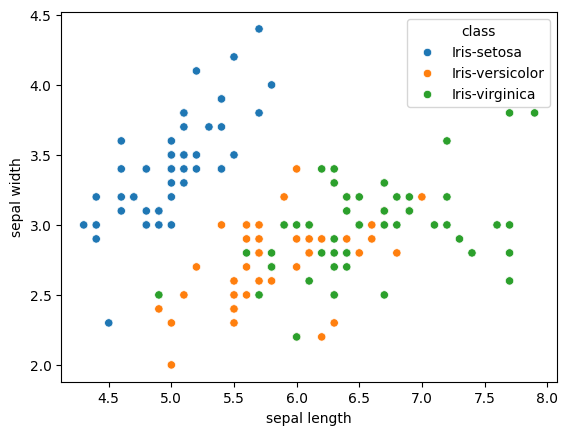

In [95]:
sns.scatterplot(x='sepal length', y='sepal width', hue='class', data=iris.data.original)
plt.show()

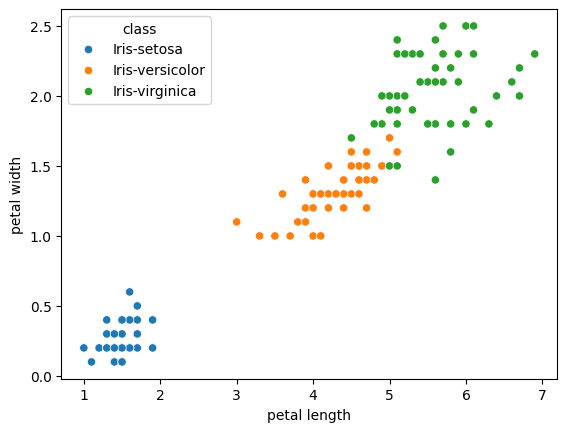

In [96]:
sns.scatterplot(x='petal length', y='petal width', hue='class', data=iris.data.original)
plt.show()

### Preparação da Data

In [97]:
X = iris.data.features 
y = iris.data.targets 

In [98]:
X = iris.data.features.to_numpy()
y = iris.data.targets.to_numpy().ravel()

In [99]:
# encode labels 
# Iris-setosa correspond to 0, Iris-versicolor correspond to 1 and Iris-virginica correspond to 2.
le = LabelEncoder()
y = le.fit_transform(y)

In [100]:
# Splitting dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)


### KNN

In [101]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

#### Experimento: KNN com partições aleatórias 70/30

- Repetimos 30 vezes para cada k em {3, 7, 11}
- Em cada repetição: dividimos em treino/teste (70/30) com uma semente aleatória diferente
- Métricas: Accuracy e F1 macro
- Visualização: boxplot com whiskers para comparar distribuições das métricas por k

KNN can be used for both classification and regression predictive problems. KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations  (x,y)
  and would like to capture the relationship between  x
  and  y
 . More formally, our goal is to learn a function  h:X→Y
  so that given an unseen observation  x
 ,  h(x)
  can confidently predict the corresponding output  y
 .

In [102]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2))**2))

In [103]:
def knn_predict(training_data, training_labels, test_point, k):
    distances = []
    for i in range(len(training_data)):
        dist = euclidean_distance(test_point, training_data[i])
        distances.append((dist, training_labels[i]))
    distances.sort(key=lambda x: x[0])
    k_nearest_labels = [label for _, label in distances[:k]]
    return Counter(k_nearest_labels).most_common(1)[0][0]

### Prediction

In [104]:
k_values = [3, 7, 11]
n_runs = 30
results = {k: [] for k in k_values}

C:\Users\alexm\AppData\Local\Temp\ipykernel_23752\3354352454.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([results[k] for k in k_values], labels=k_values, patch_artist=True)


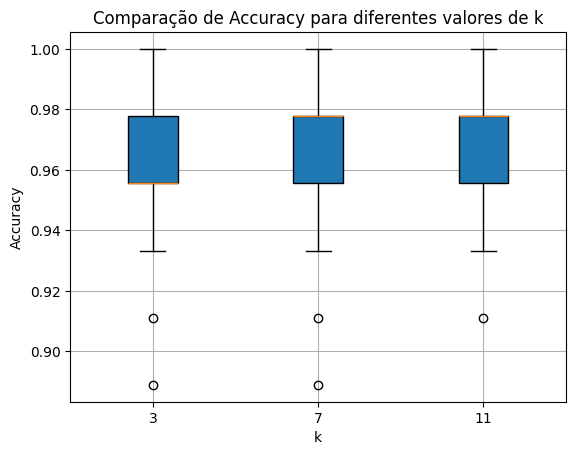

In [105]:
for k in k_values:
    for seed in range(n_runs):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
        predictions = [knn_predict(X_train, y_train, test_point, k) for test_point in X_test]
        acc = accuracy_score(y_test, predictions)
        results[k].append(acc)

# Boxplot de comparação
plt.boxplot([results[k] for k in k_values], labels=k_values, patch_artist=True)
plt.title("Comparação de Accuracy para diferentes valores de k")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


Matriz de confusão para k = 3:
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


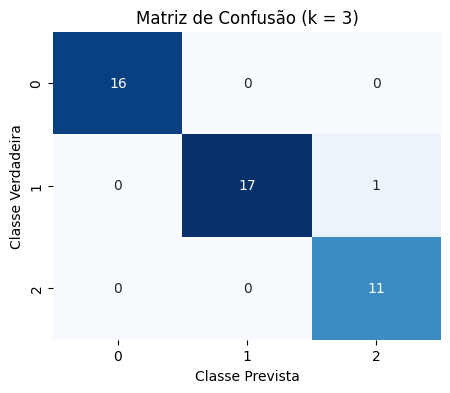

In [108]:
cm = confusion_matrix(y_test, predictions)
    
print(f"\nMatriz de confusão para k = {k}:\n{cm}")

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f"Matriz de Confusão (k = {k})")
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Verdadeira")
plt.show()

Com K par: Se houver apenas duas classes (classificação binária), é possível que o número de vizinhos pertencentes a cada classe seja exatamente igual (exemplo: $K=4$, 2 vizinhos da Classe A e 2 vizinhos da Classe B). Isso resulta em um empate, e o algoritmo não consegue decidir a classe sem regras de desempate adicionais, o que complica a implementação e a interpretação.

Com K ímpar: Ao usar um $K$ ímpar, o empate é impossível em problemas de classificação binária (duas classes), pois uma classe sempre terá pelo menos um voto a mais que a outra, garantindo uma maioria.

## Exercício 3

In [110]:
X = pd.DataFrame(X, columns=iris.data.features.columns)

In [111]:
def discretize_column(col):
    low, high = np.percentile(col, [33, 66])
    categories = []
    for val in col:
        if val <= low:
            categories.append("low")
        elif val <= high:
            categories.append("medium")
        else:
            categories.append("high")
    return categories

X_disc = X.apply(discretize_column)

### Naive Bayes (versão categórica)

In [112]:
class NaiveBayesCategorical:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.priors = {c: np.mean(y == c) for c in self.classes}
        self.likelihoods = {}
        
        for c in self.classes:
            subset = X[y == c]
            self.likelihoods[c] = {}
            for col in X.columns:
                value_counts = subset[col].value_counts(normalize=True)
                self.likelihoods[c][col] = value_counts.to_dict()
    
    def predict_one(self, x):
        probs = {}
        for c in self.classes:
            prob = np.log(self.priors[c])
            for col, val in x.items():
                prob += np.log(self.likelihoods[c][col].get(val, 1e-6))  # suavização
            probs[c] = prob
        return max(probs, key=probs.get)
    
    def predict(self, X):
        return np.array([self.predict_one(row) for _, row in X.iterrows()])

### Avaliação com 30 partições aleatórias (70%/30%)

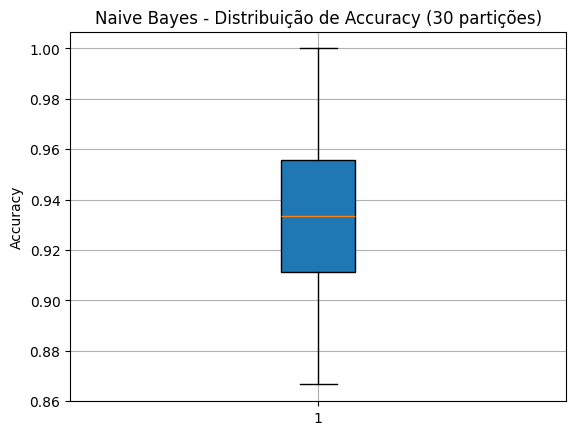

In [113]:
n_runs = 30
accuracies = []

for seed in range(n_runs):
    X_train, X_test, y_train, y_test = train_test_split(X_disc, y, test_size=0.3, random_state=seed)
    
    nb = NaiveBayesCategorical()
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Boxplot dos resultados
plt.boxplot(accuracies, patch_artist=True)
plt.title("Naive Bayes - Distribuição de Accuracy (30 partições)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

### Matriz de confusão

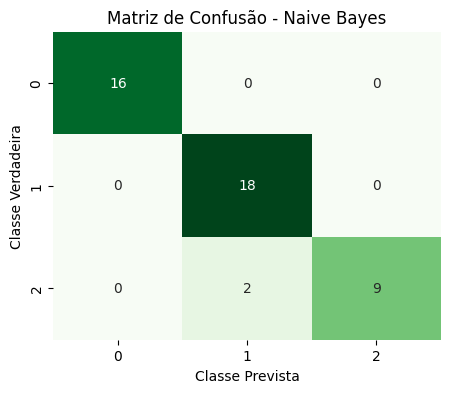

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_disc, y, test_size=0.3, random_state=0)
nb = NaiveBayesCategorical()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title("Matriz de Confusão - Naive Bayes")
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Verdadeira")
plt.show()

O k-NN consegue capturar melhor as fronteiras entre classes contínuas, como as medidas de pétalas e sépalas no dataset Iris.

O Naive Bayes, ao assumir independência entre features e ao discretizar as variáveis, perde alguma informação de precisão.

Contudo, o Naive Bayes é muito mais rápido e mais simples, sendo adequado para conjuntos de dados grandes ou de natureza simbólica.

Conclusão

Em termos de precisão, o k-NN supera o Naive Bayes no conjunto Iris,
mas o Naive Bayes é mais eficiente computacionalmente e mais fácil de interpretar.
Assim, a escolha depende do tipo de dados e da importância relativa entre velocidade e exatidão.

In [115]:
import numpy as np
import pandas as pd

# Dados Iris
from sklearn.datasets import load_iris
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Discretizar todas as features em low/medium/high
def discretize_series(s):
    low, high = np.percentile(s, [33, 66])
    return pd.cut(s, bins=[-np.inf, low, high, np.inf], labels=["low","medium","high"])

X_disc = X.apply(discretize_series)

# Transformar em binário: setosa = 1, não-setosa = 0
y_bin = (y == 0).astype(int)

# Função para calcular entropia
def entropy(labels):
    n = len(labels)
    if n == 0:
        return 0.0
    p_plus = np.sum(labels == 1) / n
    p_minus = 1 - p_plus
    def ent(p):
        return 0.0 if p == 0 else -p * np.log2(p)
    return ent(p_plus) + ent(p_minus)

# Função para calcular ganho de informação
def information_gain(S_labels, X_subset, feature):
    total_n = len(S_labels)
    gain = entropy(S_labels)
    for v in ["low","medium","high"]:
        mask = (X_subset[feature] == v)
        Sv_labels = S_labels[mask]
        gain -= (len(Sv_labels)/total_n) * entropy(Sv_labels)
    return gain

# Classe simples para nós da árvore
class Node:
    def __init__(self, feature=None, children=None, label=None):
        self.feature = feature      # feature usada neste nó
        self.children = children    # dicionário valor_feature -> nó filho
        self.label = label          # se folha, label = 0 ou 1

# Função recursiva para construir árvore
def build_tree(X, y, features):
    # Se todos iguais, nó folha
    if np.all(y == y[0]):
        return Node(label=y[0])
    # Se não há mais features, nó folha com classe majoritária
    if len(features) == 0:
        majority = 1 if np.sum(y) >= len(y)/2 else 0
        return Node(label=majority)
    
    # Escolher feature com maior ganho
    gains = {f: information_gain(y, X, f) for f in features}
    best_feature = max(gains, key=gains.get)
    
    # Criar dicionário para os filhos
    children = {}
    for v in ["low","medium","high"]:
        mask = (X[best_feature] == v)
        if mask.sum() == 0:
            # Nenhum exemplo: nó folha com classe majoritária
            majority = 1 if np.sum(y) >= len(y)/2 else 0
            children[v] = Node(label=majority)
        else:
            X_sub = X[mask].copy()
            y_sub = y[mask].copy()
            # Remover feature usada
            features_sub = [f for f in features if f != best_feature]
            children[v] = build_tree(X_sub, y_sub, features_sub)
    
    return Node(feature=best_feature, children=children)

# Construir a árvore
features_list = X_disc.columns.tolist()
tree_root = build_tree(X_disc, y_bin, features_list)

# Função para imprimir árvore de forma legível
def print_tree(node, indent=""):
    if node.label is not None:
        print(indent + f"Leaf: class={node.label}")
    else:
        print(indent + f"[Feature: {node.feature}]")
        for val, child in node.children.items():
            print(indent + f"  If {node.feature} == {val}:")
            print_tree(child, indent + "    ")

# Mostrar árvore
print_tree(tree_root)


[Feature: petal length (cm)]
  If petal length (cm) == low:
    Leaf: class=1
  If petal length (cm) == medium:
    Leaf: class=0
  If petal length (cm) == high:
    Leaf: class=0
